In [4]:
import matplotlib.pyplot as plt
import os
import seaborn as sns
from collections import Counter

import numpy as np
from PIL import Image
import random
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

from numpy import expand_dims

In [43]:
directory = 'The IQ-OTHNCCD lung cancer dataset\The IQ-OTHNCCD lung cancer dataset'

categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

In [44]:
images = []
for i in categories:
    path = os.path.join(directory, i)
    
    
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = Image.open(filepath)
        images.append(img)
                
        

In [40]:
classes = ['Bengin']*120+ ['Malignant']*561 + ['Normal']*416

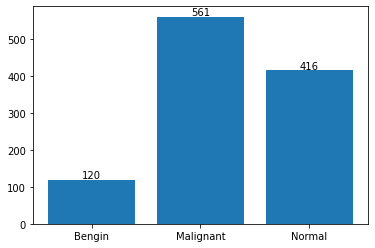

In [49]:
labels, values = zip(*Counter(classes).items())

indexes = np.arange(len(labels))
width = 0.8

plt.bar(indexes, values, width)
# zip joins x and y coordinates in pairs
for x,y in zip(indexes, values):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,1.5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.xticks(indexes , labels)

plt.show()

In [4]:
def plot_images(images_array):
    fig, axes = plt.subplots(1, 3, figsize=(30, 30))
    axes = axes.flatten()
    for img, ax in zip(images_array, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [45]:
bengin = images[:120]
malignant = images[120:120+561]
normal = images[-416:]

# Bengin

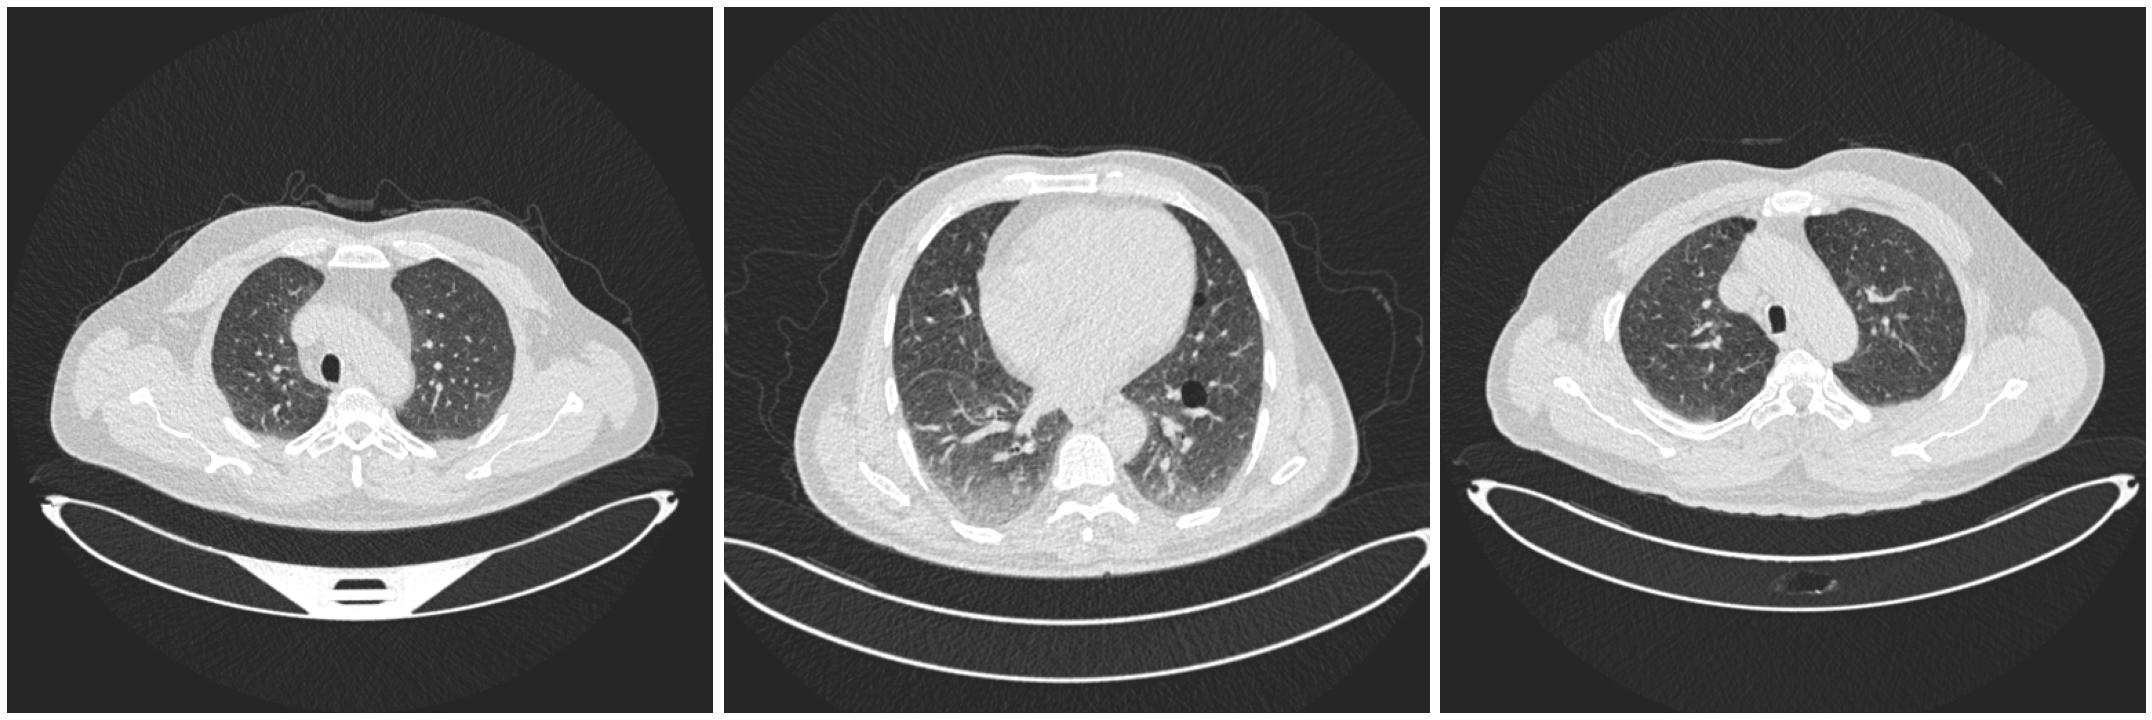

In [9]:
i = np.random.randint(0,120-3)
random.shuffle(bengin)
plot_images(bengin[i:i+3])

# Malignant

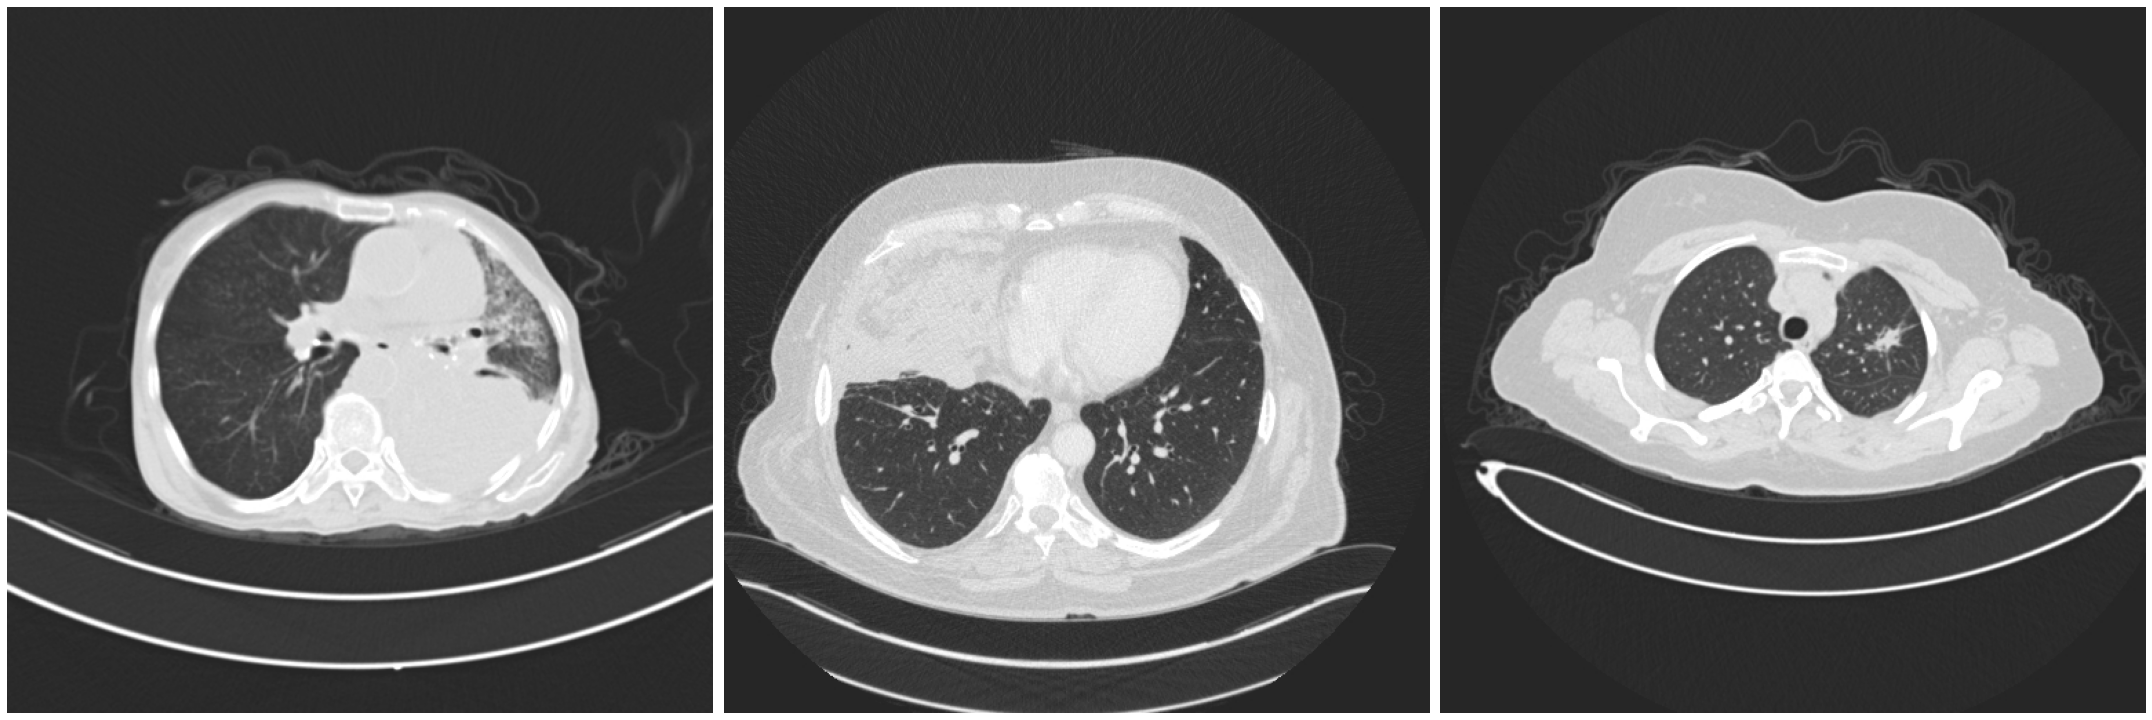

In [10]:
j = np.random.randint(0,561-3)
random.shuffle(malignant)
plot_images(malignant[j:j+3])

# Normal

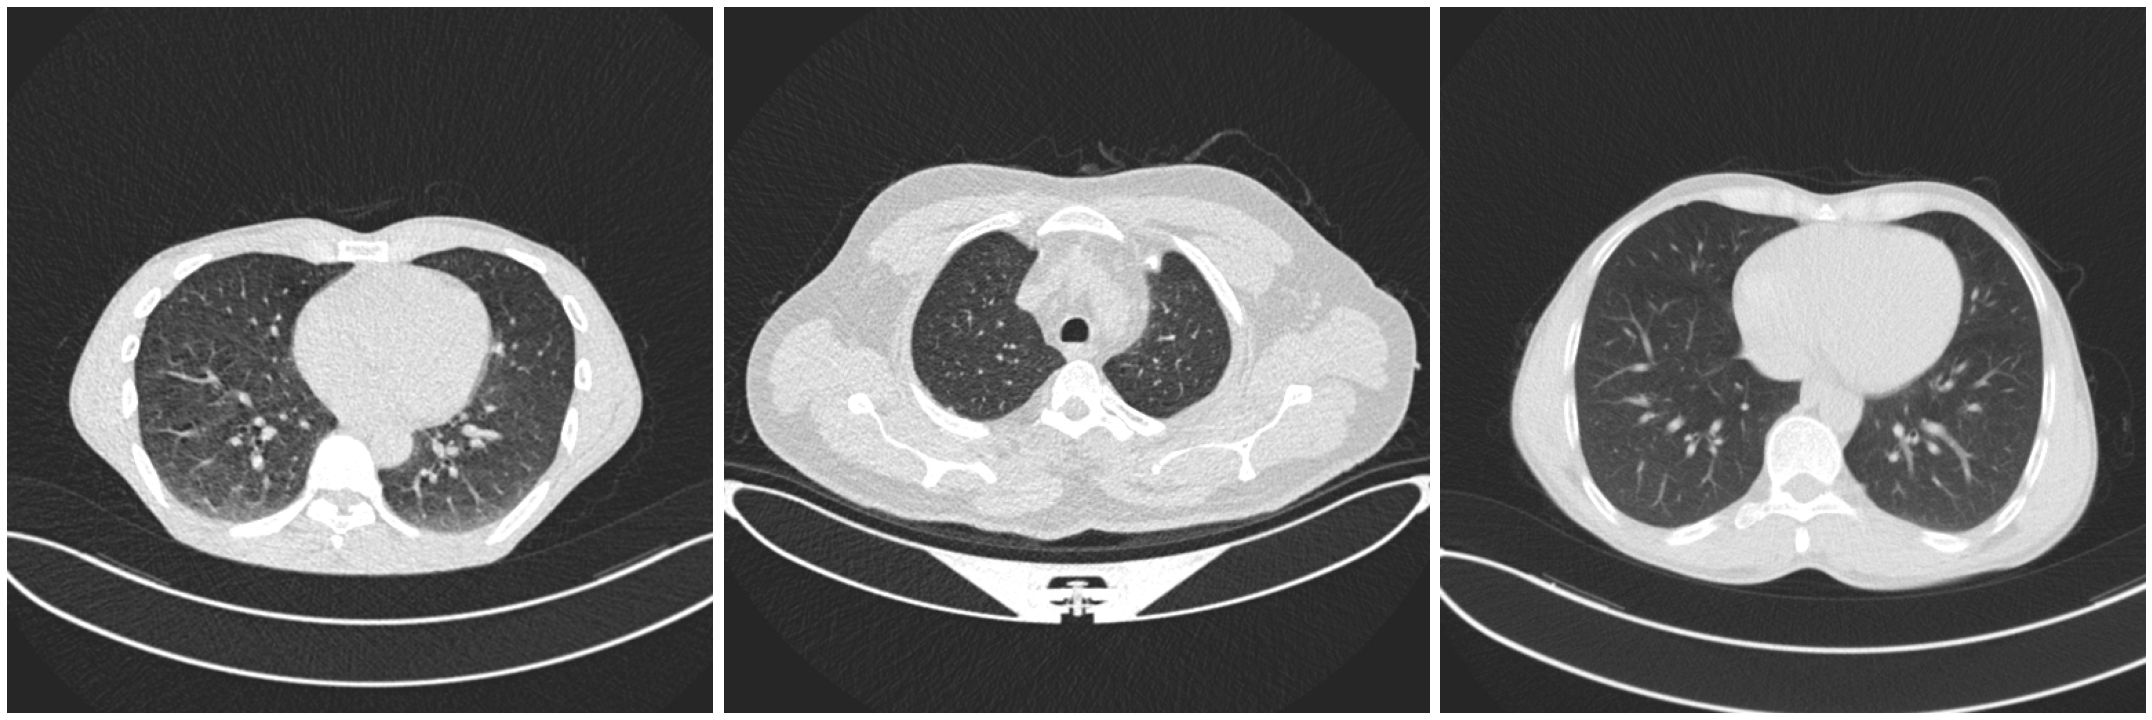

In [11]:
k = np.random.randint(0,416-3)
random.shuffle(normal)
plot_images(normal[k:k+3])

### Image Augmentation

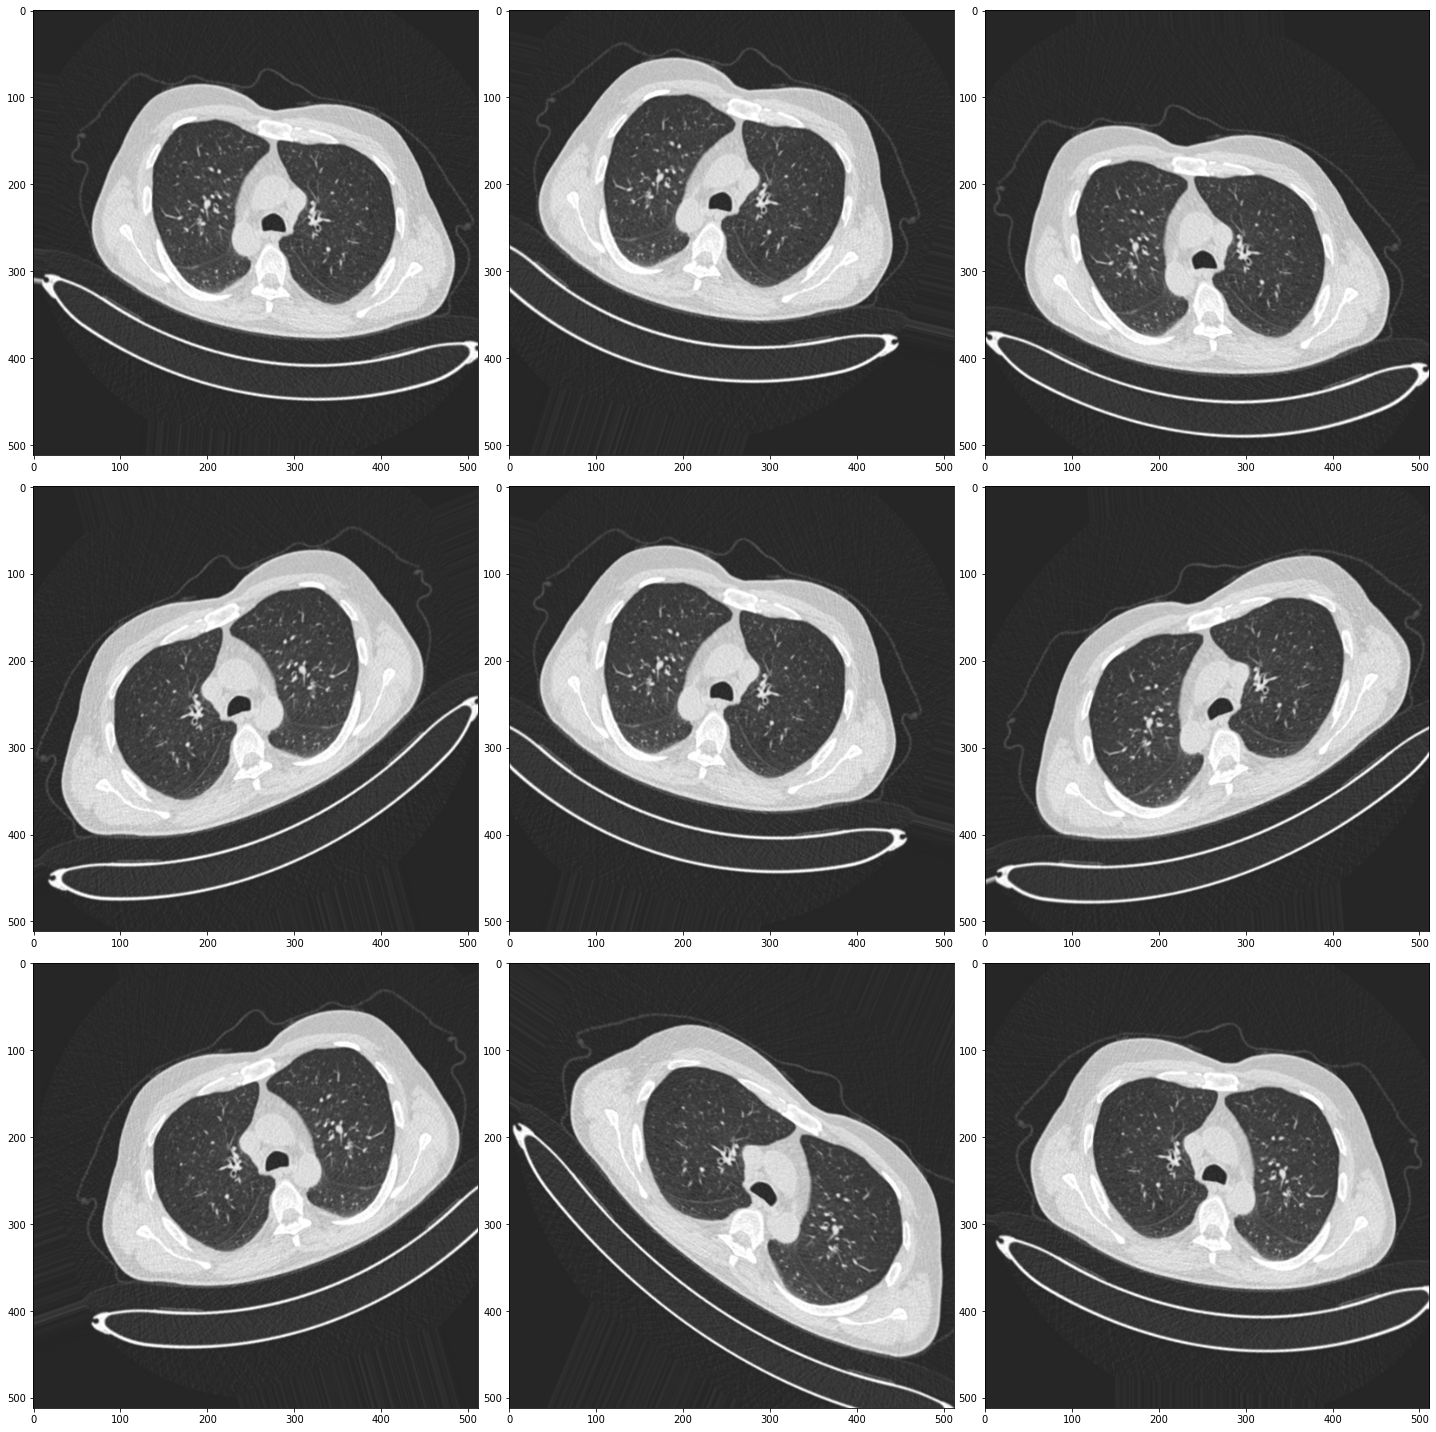

In [44]:

# load the image
img = bengin[55]
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    shear_range = 20,
    
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2)

# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
f, axes = plt.subplots(3,3, figsize=(20, 20))
for row in range(0,3):
    for col in range (0,3):
    
    
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        axes[row,col].imshow(image)
# show the figure
plt.tight_layout()
plt.show()
